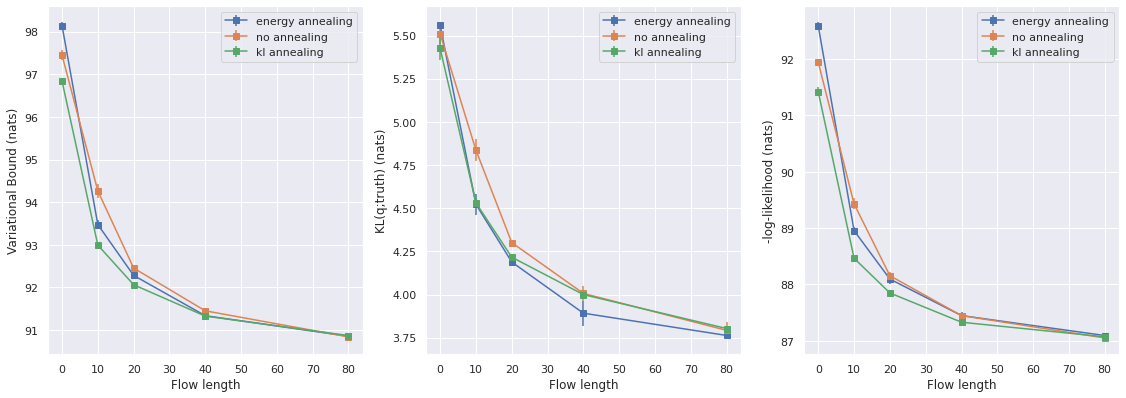

In [43]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

planarflowlengths = [0, 10, 20, 40, 80]
planaranneals = ["std", "without", "kl"]

ELBO_stdanneal = []
ELBO_withoutanneal = []
ELBO_klanneal = []

log_likelihood_stdanneal = []
log_likelihood_withoutanneal = []
log_likelihood_klanneal = []

KL_stdanneal = []
KL_withoutanneal = []
KL_klanneal = []

ELBO_stdanneal_mean = []
ELBO_withoutanneal_mean  = []
ELBO_klanneal_mean = []
ELBO_stdanneal_stdev = []
ELBO_withoutanneal_stdev  = []
ELBO_klanneal_stdev = []

log_likelihood_stdanneal_mean = []
log_likelihood_withoutanneal_mean = []
log_likelihood_klanneal_mean = []
log_likelihood_stdanneal_stdev = []
log_likelihood_withoutanneal_stdev = []
log_likelihood_klanneal_stdev = []

KL_stdanneal_mean = []
KL_withoutanneal_mean  = []
KL_klanneal_mean = []
KL_stdanneal_stdev = []
KL_withoutanneal_stdev  = []
KL_klanneal_stdev = []


def extract(flow_type, flow_lengths, anneals, metric, stdlist, withoutlist=None, kllist=None):
    for flow in flow_lengths:
        kpath = "logs/" + flow_type + "flow_k_" + str(flow)
        for anneal in anneals:
            rpath = "results_" + anneal + "annealing.json"
            filepath = os.path.join(kpath, rpath)
            metriclist = []
            with open(filepath) as file:
                data = json.load(file)
                metriclist.append(data[metric])
            rpath2 = "results_" + anneal + "annealing_2.json"
            filepath2 = os.path.join(kpath, rpath2)
            try:
                with open(filepath2) as file:
                    data = json.load(file)
                    metriclist.append(data[metric])
            except:
                pass
            rpath3 = "results_" + anneal + "annealing_3.json"
            filepath3 = os.path.join(kpath, rpath3)
            try:
                with open(filepath3) as file:
                    data = json.load(file)
                    metriclist.append(data[metric])
            except:
                pass
            if anneal == "std":
                list = stdlist
            elif anneal == "without":
                list = withoutlist
            elif anneal == "kl":
                list = kllist
            list.append(metriclist)
    
    return stdlist, withoutlist, kllist

def calculatekl(flowlengths, KL_list, ELBO_list, LL_list):
    for i in range(len(flowlengths)):
        zip_object = zip(ELBO_list[i], LL_list[i])
        KL = []
        for ELBO_i, LL_i in zip_object:
            KL.append(ELBO_i - LL_i)
        KL_list.append(KL)
    
    return KL_list

def calculatemeanstd(list, mean_list, stdev_list):
    for item in list:
        mean = sum(item) / len(item)
        stdev = np.std(item)
        mean_list.append(mean)
        stdev_list.append(stdev)
    
    return mean_list, stdev_list

def plot(metric, flowlength1, flowlength2, flowlength3, line1_mean, line1_stdev, line2_mean, line2_stdev, line3_mean, line3_stdev, label1, label2, label3):
    plt.errorbar(flowlength1, line1_mean, yerr=line1_stdev, label = label1, marker='s')
    plt.errorbar(flowlength2, line2_mean, yerr=line2_stdev, label = label2, marker='s')
    plt.errorbar(flowlength3, line3_mean, yerr=line3_stdev, label = label3, marker='s')
    plt.xlabel("Flow length")
    plt.ylabel(metric)
    plt.legend()

    
ELBO_stdanneal, ELBO_withoutanneal, ELBO_klanneal = extract("planar", planarflowlengths, planaranneals, "ELBO", ELBO_stdanneal, ELBO_withoutanneal, ELBO_klanneal)
log_likelihood_stdanneal, log_likelihood_withoutanneal, log_likelihood_klanneal = extract("planar", planarflowlengths, planaranneals, "Log_likelihood", log_likelihood_stdanneal, log_likelihood_withoutanneal, log_likelihood_klanneal)

KL_stdanneal = calculatekl(planarflowlengths, KL_stdanneal, ELBO_stdanneal, log_likelihood_stdanneal)
KL_withoutanneal = calculatekl(planarflowlengths, KL_withoutanneal, ELBO_withoutanneal, log_likelihood_withoutanneal)
KL_klanneal = calculatekl(planarflowlengths, KL_klanneal, ELBO_klanneal, log_likelihood_klanneal)

ELBO_stdanneal_mean, ELBO_stdanneal_stdev = calculatemeanstd(ELBO_stdanneal, ELBO_stdanneal_mean, ELBO_stdanneal_stdev)
ELBO_withoutanneal_mean, ELBO_withoutanneal_stdev = calculatemeanstd(ELBO_withoutanneal, ELBO_withoutanneal_mean, ELBO_withoutanneal_stdev)
ELBO_klanneal_mean, ELBO_klanneal_stdev = calculatemeanstd(ELBO_klanneal, ELBO_klanneal_mean, ELBO_klanneal_stdev)

log_likelihood_stdanneal_mean, log_likelihood_stdanneal_stdev = calculatemeanstd(log_likelihood_stdanneal, log_likelihood_stdanneal_mean, log_likelihood_stdanneal_stdev)
log_likelihood_withoutanneal_mean, log_likelihood_withoutanneal_stdev = calculatemeanstd(log_likelihood_withoutanneal, log_likelihood_withoutanneal_mean, log_likelihood_withoutanneal_stdev)
log_likelihood_klanneal_mean, log_likelihood_klanneal_stdev = calculatemeanstd(log_likelihood_klanneal, log_likelihood_klanneal_mean, log_likelihood_klanneal_stdev)

KL_stdanneal_mean, KL_stdanneal_stdev = calculatemeanstd(KL_stdanneal, KL_stdanneal_mean, KL_stdanneal_stdev)
KL_withoutanneal_mean, KL_withoutanneal_stdev = calculatemeanstd(KL_withoutanneal, KL_withoutanneal_mean, KL_withoutanneal_stdev)
KL_klanneal_mean, KL_klanneal_stdev = calculatemeanstd(KL_klanneal, KL_klanneal_mean, KL_klanneal_stdev)

plt.figure(figsize=(19.2,6.4))
plt.subplot(1,3,1)
plot("Variational Bound (nats)", planarflowlengths, planarflowlengths, planarflowlengths, ELBO_stdanneal_mean, ELBO_stdanneal_stdev, ELBO_withoutanneal_mean, ELBO_withoutanneal_stdev, ELBO_klanneal_mean, ELBO_klanneal_stdev, "energy annealing", "no annealing", "kl annealing")
plt.subplot(1,3,2)
plot("KL(q;truth) (nats)", planarflowlengths, planarflowlengths, planarflowlengths, KL_stdanneal_mean, KL_stdanneal_stdev, KL_withoutanneal_mean, KL_withoutanneal_stdev, KL_klanneal_mean, KL_klanneal_stdev, "energy annealing", "no annealing", "kl annealing")
plt.subplot(1,3,3)
plot("-log-likelihood (nats)", planarflowlengths, planarflowlengths, planarflowlengths, log_likelihood_stdanneal_mean, log_likelihood_stdanneal_stdev, log_likelihood_withoutanneal_mean, log_likelihood_withoutanneal_stdev, log_likelihood_klanneal_mean, log_likelihood_klanneal_stdev, "energy annealing", "no annealing", "kl annealing")
plt.savefig("Figure 5.png")
plt.show()

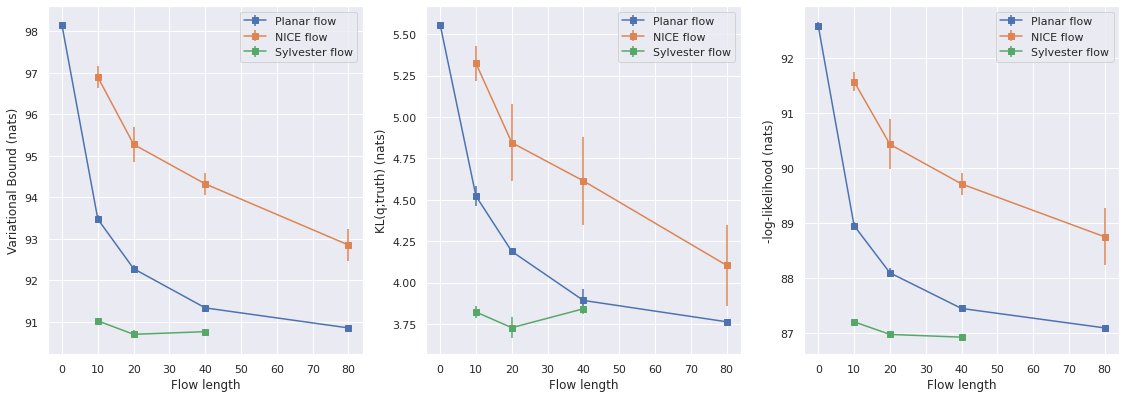

In [44]:
NICEflowlengths = [10, 20, 40, 80]
sylvesterflowlengths = [10, 20, 40]
NICEanneals = ["std"]
sylvesteranneals = ["std"]

ELBO_NICE_10 = [97.27056541442872, 96.72465171813965, 96.70010314941406]
ELBO_NICE_20 = [95.70984016418457, 94.69585426330566, 95.42611427307129]
ELBO_NICE_40 = [94.55785778045654, 94.4517280960083, 93.96711620330811]
ELBO_NICE_80 = [93.35874633789062, 92.42694671630859, 92.77336582183838]

NLL_NICE_10 = [91.80392837309404, 91.51473417734667, 91.403586453958]
NLL_NICE_20 = [90.60006130747362, 89.81288569292589, 90.88404699091478]
NLL_NICE_40 = [89.57043225359483, 89.99069121851488, 89.57381082396074]
NLL_NICE_80 = [89.243662035383745, 88.02913872255846, 88.97452756781145]

ELBO_NICE = [ELBO_NICE_10, ELBO_NICE_20, ELBO_NICE_40, ELBO_NICE_80]
log_likelihood_NICE = [NLL_NICE_10, NLL_NICE_20, NLL_NICE_40, NLL_NICE_80]
KL_NICE = []

ELBO_NICE_mean = []
ELBO_NICE_stdev = []
log_likelihood_NICE_mean = []
log_likelihood_NICE_stdev = []
KL_NICE_mean = []
KL_NICE_stdev = []

KL_NICE = calculatekl(NICEflowlengths, KL_NICE, ELBO_NICE, log_likelihood_NICE)

ELBO_NICE_mean, ELBO_NICE_stdev = calculatemeanstd(ELBO_NICE, ELBO_NICE_mean, ELBO_NICE_stdev)
log_likelihood_NICE_mean, log_likelihood_NICE_stdev = calculatemeanstd(log_likelihood_NICE, log_likelihood_NICE_mean, log_likelihood_NICE_stdev)
KL_NICE_mean, KL_NICE_stdev = calculatemeanstd(KL_NICE, KL_NICE_mean, KL_NICE_stdev)


ELBO_sylvester = []
log_likelihood_sylvester = []
KL_sylvester = []

ELBO_sylvester_mean = []
ELBO_sylvester_stdev = []
log_likelihood_sylvester_mean = []
log_likelihood_sylvester_stdev = []
KL_sylvester_mean = []
KL_sylvester_stdev = []

ELBO_sylvester, x, y = extract("syl_orthogonal", sylvesterflowlengths, sylvesteranneals, "ELBO", ELBO_sylvester)
log_likelihood_sylvester, x, y = extract("syl_orthogonal", sylvesterflowlengths, sylvesteranneals, "log_likelihood", log_likelihood_sylvester)

KL_sylvester = calculatekl(sylvesterflowlengths, KL_sylvester, ELBO_sylvester, log_likelihood_sylvester)

ELBO_sylvester_mean, ELBO_sylvester_stdev = calculatemeanstd(ELBO_sylvester, ELBO_sylvester_mean, ELBO_sylvester_stdev)
log_likelihood_sylvester_mean, log_likelihood_sylvester_stdev = calculatemeanstd(log_likelihood_sylvester, log_likelihood_sylvester_mean, log_likelihood_sylvester_stdev)
KL_sylvester_mean, KL_sylvester_stdev = calculatemeanstd(KL_sylvester, KL_sylvester_mean, KL_sylvester_stdev)


plt.figure(figsize=(19.2,6.4))
plt.subplot(1,3,1)
plot("Variational Bound (nats)", planarflowlengths, NICEflowlengths, sylvesterflowlengths, ELBO_stdanneal_mean, ELBO_stdanneal_stdev, ELBO_NICE_mean, ELBO_NICE_stdev, ELBO_sylvester_mean, ELBO_sylvester_stdev, "Planar flow", "NICE flow", "Sylvester flow")
plt.subplot(1,3,2)
plot("KL(q;truth) (nats)", planarflowlengths, NICEflowlengths, sylvesterflowlengths, KL_stdanneal_mean, KL_stdanneal_stdev, KL_NICE_mean, KL_NICE_stdev, KL_sylvester_mean, KL_sylvester_stdev, "Planar flow", "NICE flow", "Sylvester flow")
plt.subplot(1,3,3)
plot("-log-likelihood (nats)", planarflowlengths, NICEflowlengths, sylvesterflowlengths, log_likelihood_stdanneal_mean, log_likelihood_stdanneal_stdev, log_likelihood_NICE_mean, log_likelihood_NICE_stdev, log_likelihood_sylvester_mean, log_likelihood_sylvester_stdev, "Planar flow", "NICE flow", "Sylvester flow")
plt.savefig("Figure 4.png")
plt.show()

In [46]:
print(log_likelihood_stdanneal_mean, log_likelihood_withoutanneal_mean, log_likelihood_klanneal_mean, log_likelihood_NICE_mean, log_likelihood_sylvester_mean)
print(ELBO_stdanneal_mean, ELBO_withoutanneal_mean, ELBO_klanneal_mean, ELBO_NICE_mean, ELBO_sylvester_mean)

[92.58421707383359, 88.95316157602831, 88.09435103951658, 87.44633655962512, 87.09264211941922] [91.94016512960954, 89.42815200676485, 88.15420470308824, 87.44614710421129, 87.0490473261313] [91.41714924282594, 88.46347812313601, 87.84767297043368, 87.32853058638139, 87.06916275648638] [91.57408300146624, 90.4323313304381, 89.71164476535682, 88.74910944191788] [87.20379109765257, 86.97421422368252, 86.92405106641019]
[98.14235450744629, 93.47531293233236, 92.28246643066406, 91.33812123616536, 90.85548336029052] [97.44929048538208, 94.2637247657776, 92.45486413955689, 91.45242635726929, 90.84129020690918] [96.84217462539672, 92.99374221801759, 92.06369346618652, 91.32811191558838, 90.87222074508668] [96.89844009399415, 95.27726956685383, 94.32556735992432, 92.85301962534588] [91.02555866241454, 90.70140959421794, 90.76528087615968]
